# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Satrio Umar Wibisono]
- **Email:** [m312b4ky4085@bangkit.academy]
- **ID Dicoding:** [mamangumar]

## Menentukan Pertanyaan Bisnis

- Pada jam berapa sepeda paling sering disewa  
- Seberapa nyaman pelanggan untuk melakukan registrasi penyewaan

## Import Semua Packages/Library yang Digunakan

In [26]:
# import numpy, pandas, and other library used to process data analizing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Sebelum analisis dimulai data akan diambil terlebih dulu dari file yang terdapat pada directory /data dengan file day.csv dan hour.csv

In [27]:
#initialize a variable that contain a csv table content and show the top 5 in database

df_day = pd.read_csv('/content/data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
df_hour = pd.read_csv('/content/data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0,1,0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0,1,1,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0,1,2,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0,1,3,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0,1,4,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


*   daily (df_day)
  - instant adalah id transaksi pada tabel
  - dteday adalah tanggal transaksi pada tabel
  - yr adalah tahun transaksi dari nilai awal (0 = 2011)
  - mnth adalah bulan transaksi (1 = januari)
  - holiday adalah kondisi apakah penyewaan dilakukan pada hari libur (0/1)
  - weekday adalah indikasi hari pada tabel (0 (minggu) - 6 (sabtu))
  - working day adalah kondisi apakah penyewaan dilakukan pada hari kerja (0/1)
  - temp adalah temperatur rata - rata di hari penyewaan
  - atemp adalah temperatur yang dirasakan penyewa di hari penyewaan (nilai hasil penghitungan antara temperatur dan kelembaban/humidty)
  - hum adalah kelembaban rata - rata di hari penyewaan
  - windspeed adalah kecepatan angin rata-rata di hari penyewaan
  - casual adalah penyewa non-registered di hari tersebut
  - registered adalah penyewa terdaftar di hari tersebut
  - cnt adalah total penyewa di hari tersebut

*   hourly (df_hour)
  - hr adalah jam penyewaan
  - temp adalah temperatur rata - rata di jam penyewaan
  - atemp adalah temperatur yang dirasakan penyewa di jam penyewaan
  - hum adalah kelembaban rata - rata di jam penyewaan
  - windspeed adalah kecepatan angin rata-rata di jam penyewaan
  - casual adalah penyewa non-registered di jam tersebut
  - registered adalah penyewa terdaftar di jam tersebut
  - cnt adalah total penyewa di jam tersebut

**Insight:**

pada tabel df_hour dan df_day terdapat perbedaan yang dimana terdapat hr pada df_hour.

dari data disini kita bisa mengulik banyak untuk mencari jawaban dari pertanyaan yang kita punya
data penting yang akan kita proses :
*   hr
*   cnt
*   registered dan casual


### Assessing Data

Kita akan melihat data dan mengecek apakah ada ketidaksesuaian dan kekurangan serta kelebihan dari data yang ada

pertama tama kita akan melihat datatype dari masing masing kolom

In [29]:
# viewing df_hour.info() and df_day.info()

df_hour.info()
print('\n')
df_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20565 entries, 0 to 20564
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     20563 non-null  float64
 1   dteday      20565 non-null  object 
 2   season      20565 non-null  float64
 3   yr          20565 non-null  int64  
 4   mnth        20565 non-null  int64  
 5   hr          20565 non-null  int64  
 6   holiday     20563 non-null  float64
 7   weekday     20563 non-null  float64
 8   workingday  20563 non-null  float64
 9   weathersit  20563 non-null  float64
 10  temp        20563 non-null  float64
 11  atemp       20563 non-null  float64
 12  hum         20563 non-null  float64
 13  windspeed   20563 non-null  float64
 14  casual      20563 non-null  float64
 15  registered  20563 non-null  float64
 16  cnt         20563 non-null  float64
dtypes: float64(13), int64(3), object(1)
memory usage: 2.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeInde

dapat dilihat bahwa datatype dari dteday  salah yaitu object, yang dimana seharusnya adalah datetime

selanjutnya kita akan mengecek missing value dan duplicated value dari masing masing tabel

In [30]:
# check and view if df_hour and df_day has a missing and a duplicated value

# Check for missing values in df_hour
print("Missing values in df_hour:\n{}".format(df_hour.isnull().sum()))

# Check for missing values in df_day
print("\nMissing values in df_day:\n{}".format(df_day.isnull().sum()))

# Check for duplicated rows in df_hour
print("\nDuplicated rows in df_hour:{}".format(df_hour.duplicated().sum()))

# Check for duplicated rows in df_day
print("\nDuplicated rows in df_day:{}".format(df_day.duplicated().sum()))


Missing values in df_hour:
instant       2
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       2
weekday       2
workingday    2
weathersit    2
temp          2
atemp         2
hum           2
windspeed     2
casual        2
registered    2
cnt           2
dtype: int64

Missing values in df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicated rows in df_hour:3185

Duplicated rows in df_day:0


**Insight:**
- tipe data dteday adalah object yang dimana tidak sesuai dan seharusnya diganti menjadi 'datetime'
- data df_hour memiliki 2 data yang missing pada 2 id berbeda dan memiliki 3185 data yang duplicated
- data df_day tidak terdapat data yang missing dan duplicated

### Cleaning Data

disini kita akan mengubah datatype dari dteday, mengisi data yang missing, dan menghapus data yang duplikat

In [31]:
# changing datatype of dteday into datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'], errors='coerce')

In [32]:
# Interpolating missing value
df_hour.interpolate(method='linear', direction='forward', inplace=True)

# Dropping duplicated value
df_hour.drop_duplicates(inplace=True)


setelah itu kita akan mengecek kembali data yang telah diubah

In [33]:
# Recheck for dteday
df_day.info()
print('\n')
df_hour.info()
print('\n')

# Recheck for missing values in df_hour
print("Missing values in df_hour:\n{}".format(df_hour.isnull().sum()))

# Recheck for duplicated rows in df_hour
print("\nDuplicated rows in df_hour:{}".format(df_hour.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- penggantian datatype pada dteday menjadi datetime telah dilakukan untuk menyesuaikan datatype yang seharusnya dan menghindari error kedepannya
- penambahan data yang telah hilang dan penghapusan data yang duplikat pada df_hour telah dilakukan
- Data pada df_day tidak perlu untuk dibersihkan karena tidak terdapat data yang hilang ataupun duplikat

## Exploratory Data Analysis (EDA)

### Explore berapa lama data mulai dicatat, jumlah penyewaan perjamnya selama selang waktu tersebut, dan total penjualan casual serta registered

Untuk langkah pertama akan ditampilkan rangkuman statistik untuk kedua tabel

In [85]:

# Describe df_hour
print("Describe df_hour: \n{}".format(df_hour.describe()))

# Describe df_day
print("\n\n\n\nDescribe df_day: \n{}".format(df_day.describe()))


Describe df_hour: 
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000    

dapat dilihat bahwa 17379 baris data pada tabel df_hour dan 731 baris data pada tabel df_day. Dapat dilihat bahwa jam dicatat mulai dari pukul 0 (tengah malam) hingga 23 (11 malam). Data dicatat mulai dari tanggal 1 Januari 2011 hingga 31 desember 2012 atau bisa disebut juga bahwa pencatatan berlangsung selama 2 tahun penuh

Selanjutnya akan dicari nilai dari banyaknya penyewaan selama 2 tahun pada tiap jamnya

In [35]:
total_rent_each_hour = df_hour.groupby('hr').agg({'registered': 'sum', 'casual': 'sum', 'cnt': 'sum'}).sort_values('cnt', ascending = False)

print(total_rent_each_hour)

     registered   casual       cnt
hr                                
17     282640.0  54220.0  336860.0
18     265276.0  44496.0  309772.0
8      245240.0  15761.0  261001.0
16     173914.0  53834.0  227748.0
19     191284.0  35505.0  226789.0
13     132206.0  52713.0  184919.0
12     134696.0  49718.0  184414.0
15     128543.0  54606.0  183149.0
14     120563.0  55089.0  175652.0
20     138172.0  26378.0  164550.0
9      136980.0  22458.0  159438.0
7      146134.0   8037.0  154171.0
11     108034.0  43286.0  151320.0
10      92468.0  33789.0  126257.0
21     104875.0  20570.0  125445.0
22      79412.0  16200.0   95612.0
23      52876.0  11065.0   63941.0
6       52115.0   3017.0   55132.0
0       31755.0   7375.0   39130.0
1       19455.0   4709.0   24164.0
2       12940.0   3412.0   16352.0
5       13249.0   1012.0   14261.0
3        6281.0   1893.0    8174.0
4        3554.0    874.0    4428.0
123        47.0     15.5      62.5


disini terlihat bahwa penyewaan sepeda terbanyak dimulai sore hari rentang jam 4 sore hingga jam 7 malam dan jam 8 pagi

Terdapat juga kesalahan pada data yang dimana jam bernilai '123' muncul

Maka dari itu baris yang memiliki nilai 123 akan dihapus

In [86]:
df_hour.drop(df_hour[df_hour['hr'] == 123].index, inplace=True)
total_rent_each_hour = df_hour.groupby('hr').agg({'registered': 'sum', 'casual': 'sum', 'cnt': 'sum'}).sort_values('cnt', ascending = False)
print(total_rent_each_hour)

    registered   casual       cnt
hr                               
17    282640.0  54220.0  336860.0
18    265276.0  44496.0  309772.0
8     245240.0  15761.0  261001.0
16    173914.0  53834.0  227748.0
19    191284.0  35505.0  226789.0
13    132206.0  52713.0  184919.0
12    134696.0  49718.0  184414.0
15    128543.0  54606.0  183149.0
14    120563.0  55089.0  175652.0
20    138172.0  26378.0  164550.0
9     136980.0  22458.0  159438.0
7     146134.0   8037.0  154171.0
11    108034.0  43286.0  151320.0
10     92468.0  33789.0  126257.0
21    104875.0  20570.0  125445.0
22     79412.0  16200.0   95612.0
23     52876.0  11065.0   63941.0
6      52115.0   3017.0   55132.0
0      31755.0   7375.0   39130.0
1      19455.0   4709.0   24164.0
2      12940.0   3412.0   16352.0
5      13249.0   1012.0   14261.0
3       6281.0   1893.0    8174.0
4       3554.0    874.0    4428.0


setelah penghapusan data yang tidak sesuai selanjutnya akan dicari nilai dari penyewaan total, teregristrasi, dan casual/tidak teregristrasi

In [84]:
print("registered rented: \n{}".format(df_day['registered'].sum()))
print("\nunregistered rented: \n{}\n".format(df_day['casual'].sum()))
print("\ntotal rent: \n{}".format(df_day['cnt'].sum()))

registered rented: 
2672662

unregistered rented: 
620017


total rent: 
3292679


**Insight:**
- Didapatkan data total sewa perjamnya yang dimana pagi hari jam 8 dan sore hari jam 4 hingga jam 7 malam adalah waktu dimana penyewaan paling ramai
- Didapatkan juga data dari jumlah penyewa yang telah teregristasi sebanyak 2672662 sewaan dan yang tidak 620017 sewaan dengan total 3292679

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa sepeda paling sering disewa?

Untuk memvisualisasikan perbandingan data secara langsung agar mudah dilihat maka akan ditampilkan barplot dari banyaknya total penyewaan tiap jamnya selama 2 tahun

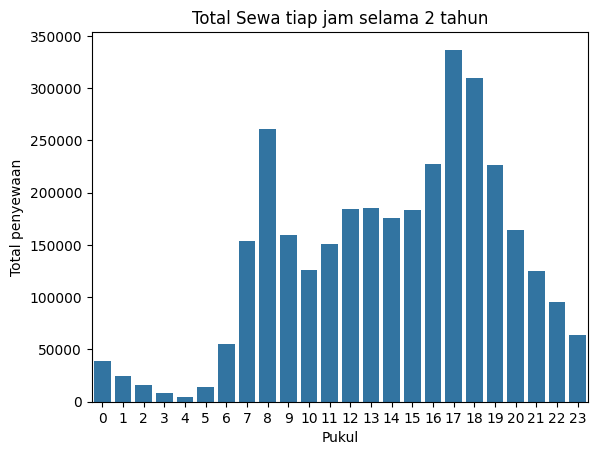

In [87]:
sns.barplot(x = total_rent_each_hour.index, y = total_rent_each_hour['cnt'], orient = 'v')
plt.ylabel('Total penyewaan')
plt.xlabel('Pukul')
plt.title('Total Sewa tiap jam selama 2 tahun')
plt.show()

Dilihat dari data dari pukul 0 (12 pagi) hingga 23 (11 malam) terdapat perbedaan jumlah total sewa selama 2 tahun yang cukup signifikan pada beberapa waktu

Dan akan dipilih 5 tertinggi untuk ditampilkan sebagai indikasi waktu dimana penyewaan tertinggi selama 2 tahun bisnis penyewaan berlangsung

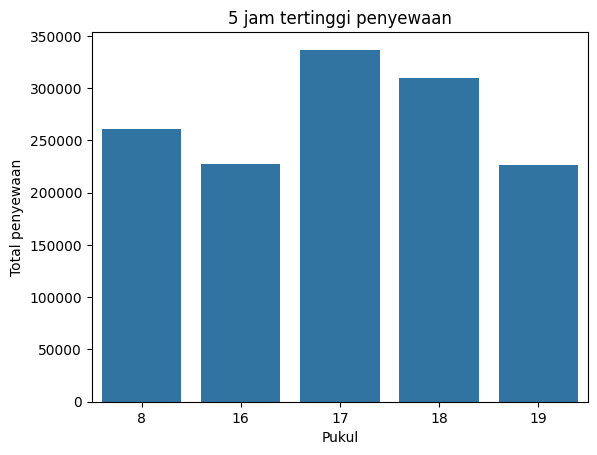

In [78]:
total_rent_each_hour = df_hour.groupby('hr').agg({'registered': 'sum', 'casual': 'sum', 'cnt': 'sum'}).sort_values('cnt', ascending = False).head()
sns.barplot(x = total_rent_each_hour.index, y = total_rent_each_hour['cnt'], orient = 'v')
plt.ylabel('Total penyewaan')
plt.xlabel('Pukul')
plt.title('5 jam tertinggi penyewaan')
plt.show()

Berdasarkan data yang ditampilkan para penyewa lebih suka menyewa pada jam 5 sore
yang dimana rentang penyewaan favorit adalah pukul 4 sore hingga pukul 7 malam dan pukul 8 pagi
dengan data sebagai berikut
1. pukul 17.00 = 336860 penyewaan
2. pukul 18.00 = 309772 penyewaan
3. pukul 8.00 = 261001 penyewaan
4. pukul 16.00 = 227748 penyewaan
5. pukul 19.00 = 226789 penyewaan

Dapat disimpulkan penyewa lebih suka menyewa sepeda pada sore hari dan pagi hari pukul 8


### Pertanyaan 2: Seberapa nyaman pelanggan untuk melakukan registrasi penyewaan?

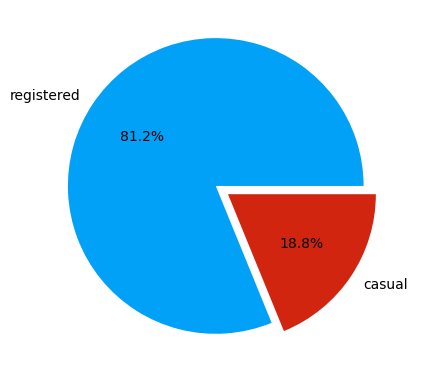

In [73]:
colors = ('#00a1f7', '#d1250f')

plt.pie(
    x = (df_day['registered'].sum(), df_day['casual'].sum()),
    labels = ('registered', 'casual'),
    autopct='%1.1f%%',
    colors = colors,
    explode = (0.1, 0)
)
plt.show()

Berdasarkan data yang ditampilkan dapat disimpulkan bahwa sebanyak 81,2% penyewa nyaman untuk melakukan registrasi dengan 18,8% sisanya tidak cukup nyaman untuk melakukan registrasi sebelum menyewa

**Insight:**
- dihasilkan bahwa penyewa paling banyak memilih pukul 5 sore untuk menyewa sepeda
- dapat dilihat juga bahwa 81,2% jumlah penyewaan dilakukan oleh penyewa yang telah teregristrasi

## Conclusion

- Sebagian besar penyewa lebih suka untuk melakukan penyewaan di sore hari dari pukul 4 hingga 7 malam dan pagi hari pukul 8 dengan puncak penyewaan pada pukul 5 dan sedikitnya penyewa terendah pada tengah malam pukul 12 hingga pukul 5 dini hari

- dari total penyewaan berkisar 3.292.679 sewa sebanyak 81,2% penyewaan dilakukan oleh penyewa yang telah teregristrasi dibandingkan dengan 18,8% penyewaan yang dilakukana oleh yang casual atau belum teregristrasi. Hal ini mengindikasikan bahwa penyewa lebih banyak yang merasa cukup nyaman meregristasikan dirinya dalam penyewaan dibandingkan yang casual